In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
data = []

pattern = r'Configuration: \{"goal": "navigate_to_gate \((?P<goal>.*?)\)"[^}]*\}. Negotiation time: (?P<time>\d+\.\d+) seconds. Rounds: (?P<rounds>\d+). Result: (?P<result>\S+)'

sim_files = [os.path.join('../results', f) for f in os.listdir('../results') if f.startswith('simulation-')] # and (f.endswith('2.log') or f.endswith('pc.log'))]

for log_file_path in sim_files:
    with open(log_file_path, 'r') as file:
        for line in file:
            match = re.search(pattern, line)
            if match:
                config = match.group("goal")
                rounds = int(match.group("rounds")) // 2 + (int(match.group("rounds")) % 2 > 0)
                time = float(match.group("time"))
                result = match.group("result")
                setting = re.search(r'simulation-(.*).log', log_file_path).group(1)
                data.append({"configuration": config, "rounds": rounds, "negotiation_time": time, "result": result, "setting": setting})

# Creare il DataFrame
df = pd.DataFrame(data)
df.head()

,configuration,rounds,negotiation_time,result,setting
0,"User: A, Negotiating against: B",5,0.568,no-agreement,onrobot
1,"User: A, Negotiating against: C",7,0.682,no-agreement,onrobot
2,"User: A, Negotiating against: D",8,0.742,loser,onrobot
3,"User: A, Negotiating against: E",8,0.783,loser,onrobot
4,"User: A, Negotiating against: F",5,0.578,loser,onrobot


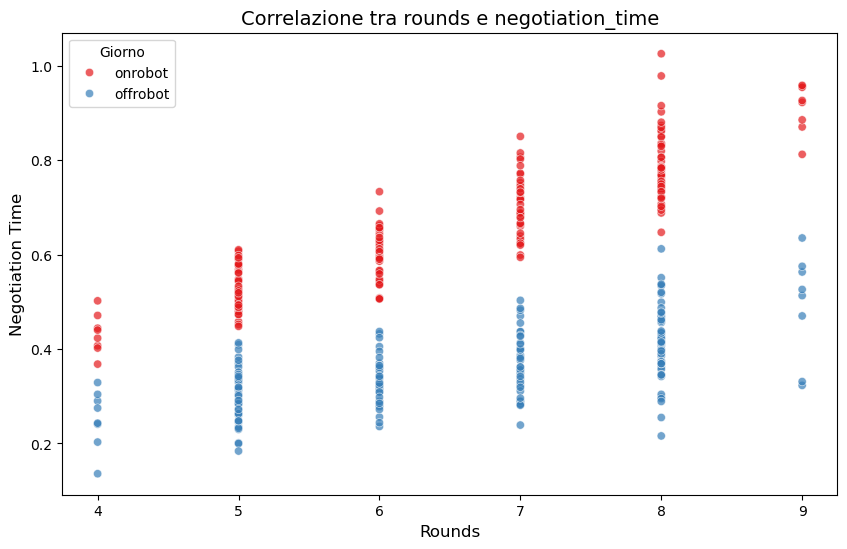

In [3]:
# Creare il grafico
plt.figure(figsize=(10, 6))

plotting_df = df

sns.scatterplot(data=plotting_df, x='rounds', y='negotiation_time', hue='setting', palette='Set1', alpha=0.7)

# Aggiungere titolo e etichette
plt.title("Correlazione tra rounds e negotiation_time", fontsize=14)
plt.xlabel("Rounds", fontsize=12)
plt.ylabel("Negotiation Time", fontsize=12)
plt.legend(title="Giorno", fontsize=10)

# Mostrare il grafico
plt.show()

In [4]:
df[df['configuration'].str.startswith("User: H, Negotiating against: I")]


,configuration,rounds,negotiation_time,result,setting
70,"User: H, Negotiating against: I",4,0.502,winner,onrobot
169,"User: H, Negotiating against: I",4,0.402,winner,onrobot
321,"User: H, Negotiating against: I",4,0.203,winner,offrobot
339,"User: H, Negotiating against: I",4,0.275,winner,offrobot


In [5]:
# Raggruppare per setting e calcolare le statistiche descrittive
stats = df.groupby('setting').agg({
    #'rounds': ['mean', 'min', 'max', 'std'],
    'negotiation_time': ['mean', 'min', 'max', 'std']
})

# Visualizzare le statistiche
print(stats)

         negotiation_time                        
                     mean    min    max       std
setting                                          
offrobot         0.358322  0.136  0.635  0.087307
onrobot          0.661667  0.368  1.025  0.135784


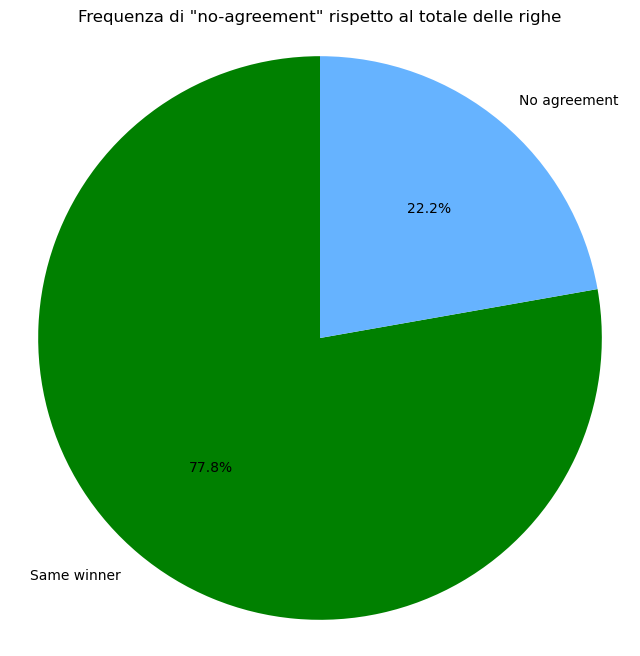

Same winner: 140 / 180 (77.78%)


In [6]:
sim_res_df = df[df['setting'] == 'offrobot']

# Contare il numero di "no-agreement" e il totale delle righe
result_count = sim_res_df[sim_res_df['result'] != 'no-agreement'].shape[0]
total_count = sim_res_df.shape[0]

# Creare i dati per il grafico a torta
labels = ['Same winner', 'No agreement']
sizes = [result_count, total_count - result_count]
colors = ['green','#66b3ff']
explode = (0.1, 0)  # "esplodere" il primo pezzo (No Agreement)

# Creare il grafico a torta
plt.figure(figsize=(8, 8))
#plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Frequenza di "no-agreement" rispetto al totale delle righe')
plt.axis('equal')  # Assicurarsi che il grafico sia un cerchio

# Mostrare il grafico
plt.show()
print(f'Same winner: {result_count} / {total_count} ({result_count / total_count * 100:.2f}%)')